In [120]:
from sklearn.datasets import make_blobs 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

Ex. 2.

In [121]:
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)

Ex. 3.

In [122]:
print("X shape: ", X.shape)
print("Y shape: ", y.shape)

X shape:  (120, 2)
Y shape:  (120,)


Ex. 4.

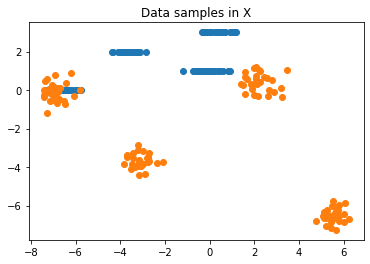

In [123]:
plt.scatter(X[:, 1], y)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data samples in X")
plt.show()

Ex. 5.

In [124]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=4).fit(X)
predicted_clusters = clf.predict(X)
print(predicted_clusters)

[2 1 1 0 1 0 0 0 2 3 3 1 0 0 0 3 2 3 3 3 0 1 3 0 0 2 2 3 0 2 0 3 1 1 3 2 3
 3 3 0 2 2 2 1 3 3 1 2 1 2 2 1 2 0 1 0 0 1 0 1 3 1 0 0 0 2 0 2 3 1 0 0 1 3
 2 3 3 3 1 3 1 1 1 1 0 2 0 0 2 2 2 3 1 0 3 1 3 2 1 1 3 0 1 3 1 2 3 1 0 2 2
 2 3 1 2 2 2 3 2 0]


Ex. 6.

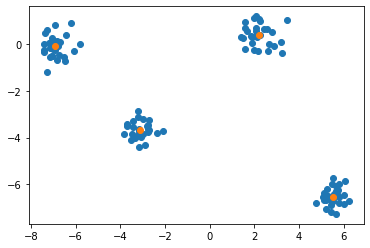

In [125]:
centers = clf.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

Ex. 7.

In [126]:
inertia = clf.inertia_
print("Inertia: ", inertia)

Inertia:  39.87739000723725


# K-means clustering-example II

Ex. 1.

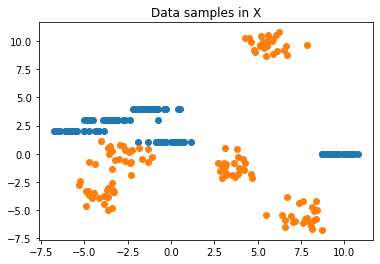

In [127]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

plt.figure()
plt.scatter(X[:, 1], y)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data samples in X")
plt.show()

Ex. 2.

In [128]:
clf0 = KMeans(n_clusters=5).fit(X)
predicted_clusters0 = clf0.predict(X)
print(predicted_clusters0)

[1 3 2 0 1 4 1 1 0 4 0 1 1 3 2 4 0 3 2 0 4 0 4 0 1 4 2 2 3 0 4 3 3 1 3 3 1
 1 3 4 1 2 2 0 0 2 2 4 2 0 2 3 3 2 3 4 4 0 0 0 0 1 2 2 2 3 3 3 3 1 1 4 4 4
 1 3 4 1 2 3 2 3 3 2 1 1 4 0 0 4 4 4 1 4 0 2 0 2 1 0 1 0 0 1 3 1 2 4 0 3 3
 0 3 2 4 2 1 1 2 4]


Ex. 3.

In [129]:
clf1 = KMeans(n_clusters=2).fit(X)
predicted_clusters1 = clf1.predict(X)
print(predicted_clusters1)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0]


Ex. 4.

In [130]:
inertia0 = clf0.inertia_
inertia1 = clf1.inertia_
print("Inertia for 5 cluster: ", inertia0)
print("Inertia for 2 cluster: ", inertia1)

Inertia for 5 cluster:  127.7676333312801
Inertia for 2 cluster:  2709.9847528669634


# K-means ++

Ex. 1.

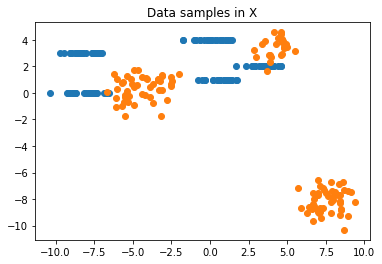

In [131]:
init='k-means++'

X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

clf = KMeans(n_clusters=5, init='k-means++').fit(X)

plt.figure()
plt.scatter(X[:, 1], y)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data samples in X")
plt.show()

Ex. 2.

In [132]:
inertia = clf.inertia_
print("Inertia for 5 cluster: ", inertia)

Inertia for 5 cluster:  115.23309269627369


# Elbow Method

Ex. 1.

In [133]:
clusters_range = [i for i in range(1, 10)]
list_inertia = []
X, y = make_blobs(n_samples=120, n_features=2, centers=10, cluster_std=0.5)
for t in clusters_range:
    

    clf = KMeans(n_clusters=t).fit(X)
    
    inertia = clf.inertia_
    list_inertia.append(inertia)




Ex. 2.

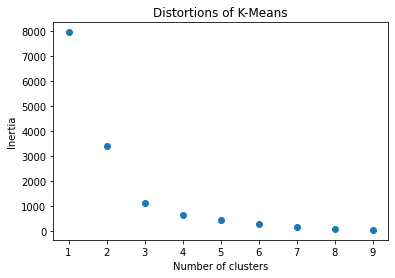

In [134]:
plt.figure()
plt.scatter(clusters_range, list_inertia)
plt.title("Distortions of K-Means")
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")
plt.show()

# Clustering II- hierarchical methods

Ex. 1.

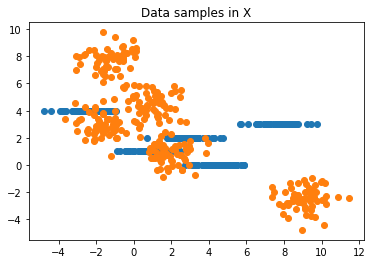

In [135]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)

plt.scatter(X[:, 1], y_true)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Data samples in X")
plt.show()

Ex. 2.

In [136]:
clf = KMeans(n_clusters=2).fit(X)

Ex. 3.

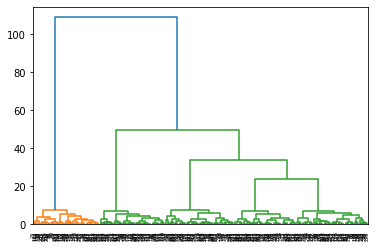

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'ward')
dn = dendrogram(Z)
plt.show()

Ex. 4.

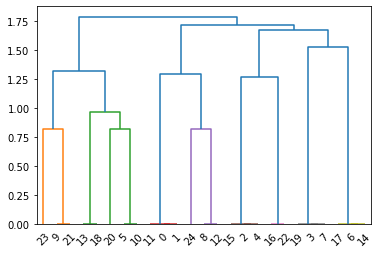

In [138]:
clf = KMeans(n_clusters=2).fit(X)
Z = linkage(clf.labels_, 'ward')
dn = dendrogram(Z)
plt.show()

# Agglromerative clustering
Ex. 5.

In [139]:
import pandas as pd

df = pd.read_csv("shopping_data.csv")

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

Ex. 6.

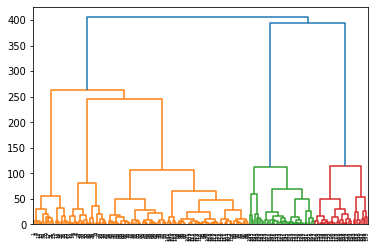

In [140]:
Z = linkage(X, method='ward')
dn = dendrogram(Z)
plt.show()